# Q4 — Temporal patterns in accident rates

In [1]:
# Imports & load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set(rc={"figure.figsize":(12,5)})
DATA_PATH = "../Data/us_accidents_sample_500k_clean.csv"
df = pd.read_csv(DATA_PATH, parse_dates=["Start_Time"], low_memory=False)
df = df.dropna(subset=["Start_Time"])


# Aggregate to daily and monthly counts

In [2]:
df["date"] = df["Start_Time"].dt.date
df["month"] = df["Start_Time"].dt.to_period("M").astype(str)
daily = df.groupby("date").size().rename("count").reset_index()
daily["date"] = pd.to_datetime(daily["date"])
daily = daily.set_index("date").asfreq("D", fill_value=0)

monthly = daily["count"].resample("M").sum()


C:\Users\jacob\AppData\Local\Temp\ipykernel_23696\826061190.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = daily["count"].resample("M").sum()


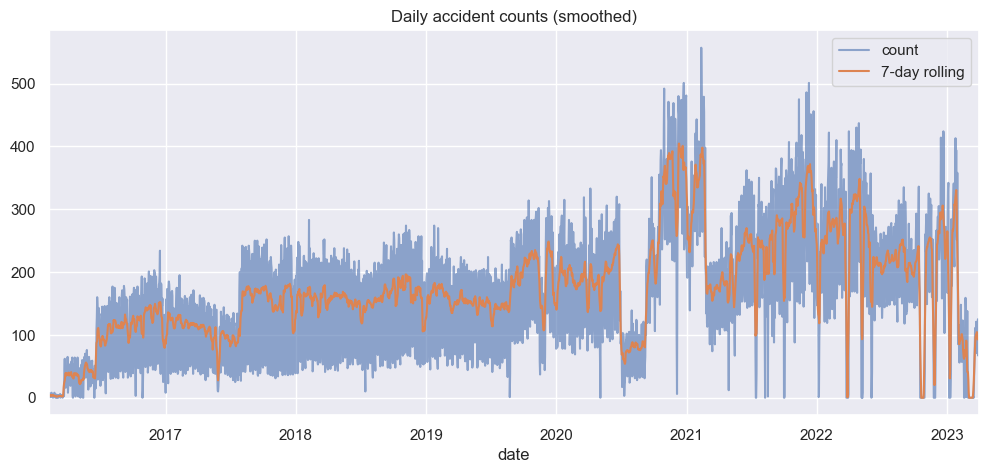

In [3]:
# Plot raw daily + smoothed (7-day)
plt.figure()
daily["count"].plot(alpha=0.6)
daily["count"].rolling(7, center=True).mean().plot(label="7-day rolling")
plt.title("Daily accident counts (smoothed)")
plt.legend()


Text(0, 0.5, 'accidents per month')

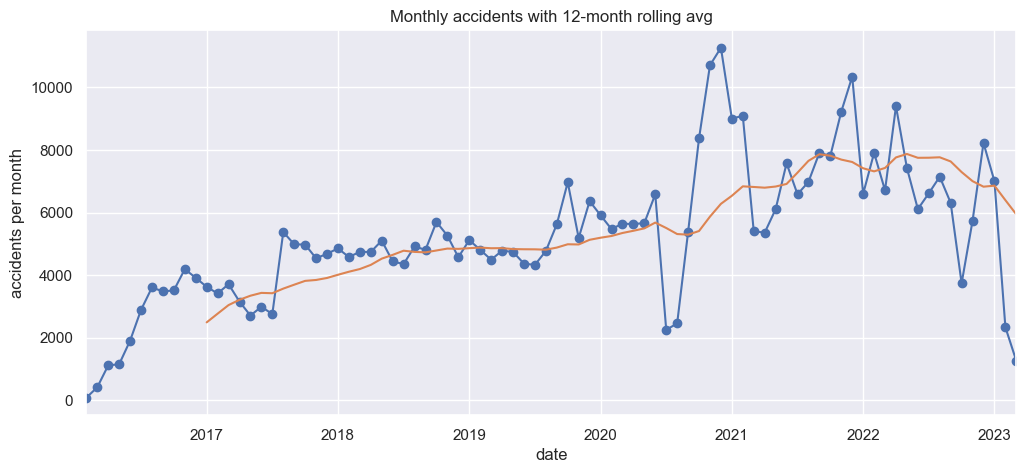

In [4]:
# Monthly trend with 12-month rolling
plt.figure()
monthly.plot(marker="o")
monthly.rolling(12).mean().plot(title="Monthly accidents with 12-month rolling avg")
plt.ylabel("accidents per month")


# Seasonal decomposition of monthly series

Text(0.5, 0.98, 'Seasonal decomposition (monthly)')

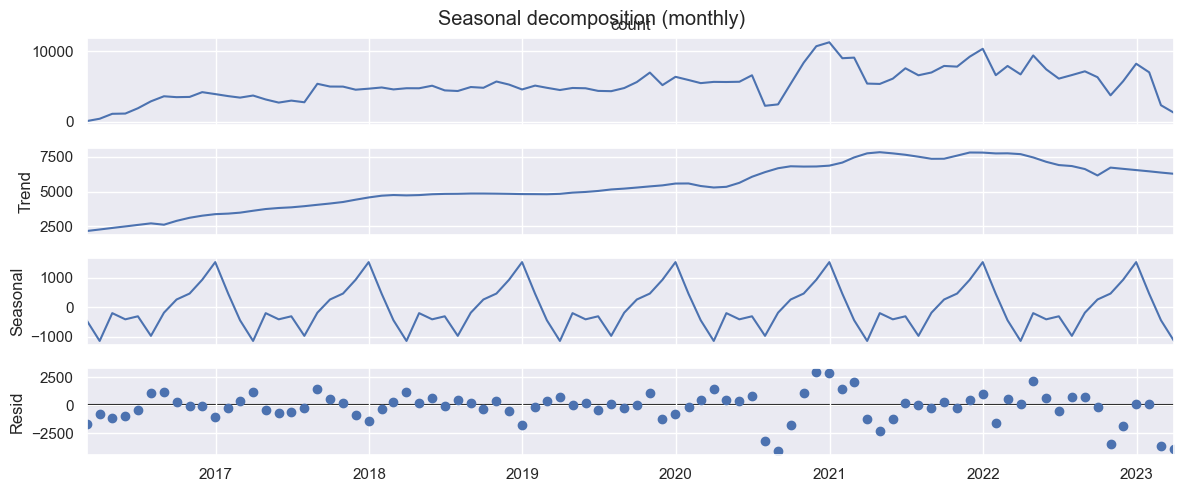

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(monthly, model="additive", period=12, extrapolate_trend="freq")
res.plot()
plt.suptitle("Seasonal decomposition (monthly)")


# Heatmap: Day-of-week vs hour-of-day

Text(0.5, 1.0, 'Accident frequency: Day of week × Hour of day')

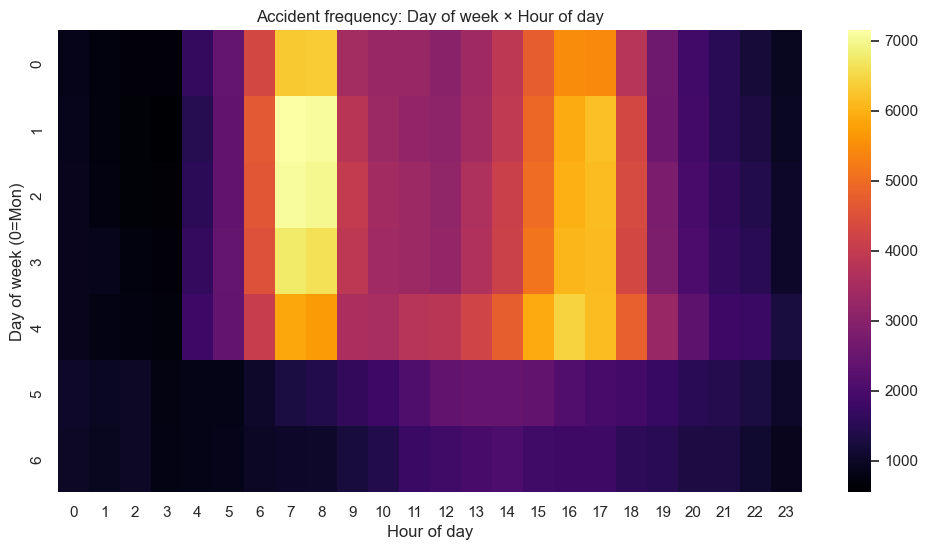

In [ ]:
df["Hour"] = df["Start_Time"].dt.hour
df["Dow"] = df["Start_Time"].dt.dayofweek  # 0=Mon
pivot = df.groupby(["Dow","Hour"]).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="inferno")
plt.xlabel("Hour of day")
plt.ylabel("Day of week (0=Mon)")
plt.title("Accident frequency: Day of week x Hour of day")


# Weekly trends (average day-of-week pattern)

Text(0.5, 0, 'Hour')

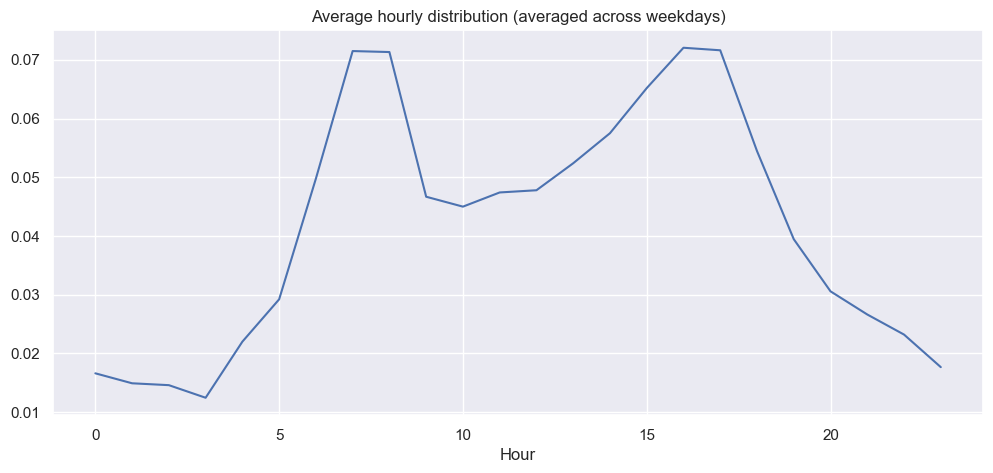

In [7]:
dow_hour = df.groupby(["Dow", "Hour"]).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack()
dow_hour.T.mean(axis=1).plot()
plt.title("Average hourly distribution (averaged across weekdays)")
plt.xlabel("Hour")
